In [414]:
#############################################  Baseball Case Study #############################################################3
#Problem Statement:
#This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm
#that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 
#There are 16 different features that will be used as the inputs to the machine learning and the output will be a value 
#that represents the number of wins. 

In [415]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [416]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df
#R: Runs,AB: At Bats,H: Hits,2B: Doubles,3B: Triples,HR: Homeruns,BB: Walks,SO: Strikeouts,SB: Stolen Bases,
#RA: Runs Allowed,ER: Earned Runs,ERA: Earned Run Average (ERA),CG: Complete Games,Shutouts:SHO,Saves:SV,
#E: Errors,W: Win


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [417]:
chanceofwin= []
for row in df['W']:
    if row<82:
        chanceofwin.append(0)
    else:          
        chanceofwin.append(1)

print(chanceofwin)
  

[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]


In [418]:
df['chanceofwin'] = chanceofwin

In [419]:
df.shape

(30, 18)

In [420]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E', 'chanceofwin'],
      dtype='object')

In [421]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,0.466667
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,0.507416
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,0.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,0.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,0.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,1.000000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,1.000000


In [422]:
df.isnull().sum().sum()

0

In [423]:
df.dtypes

W                int64
R                int64
AB               int64
H                int64
2B               int64
3B               int64
HR               int64
BB               int64
SO               int64
SB               int64
RA               int64
ER               int64
ERA            float64
CG               int64
SHO              int64
SV               int64
E                int64
chanceofwin      int64
dtype: object

0    16
1    14
Name: chanceofwin, dtype: int64

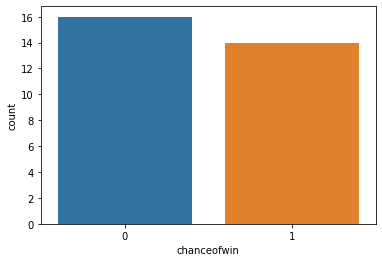

In [424]:
sns.countplot(df['chanceofwin'])
df['chanceofwin'].value_counts()

In [425]:
correlations = df.corr()['W'].sort_values(ascending=False)
print(correlations)

W              1.000000
chanceofwin    0.828656
SV             0.666530
BB             0.484342
SHO            0.471805
R              0.430751
2B             0.427797
HR             0.307407
SO             0.111850
CG             0.080533
H              0.037612
AB            -0.087947
E             -0.089485
SB            -0.157234
3B            -0.251118
ER            -0.809435
RA            -0.812952
ERA           -0.819600
Name: W, dtype: float64


<AxesSubplot:>

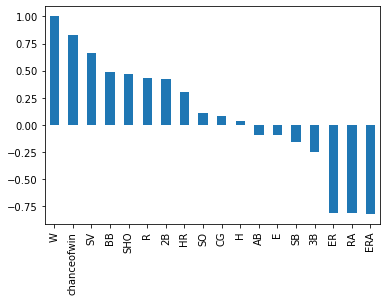

In [426]:
correlations.plot(kind='bar')

In [427]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485,0.828656
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.419498
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.204192
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,-0.093320
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.276907
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.300376
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.322740
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.456912
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.047943
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.142973


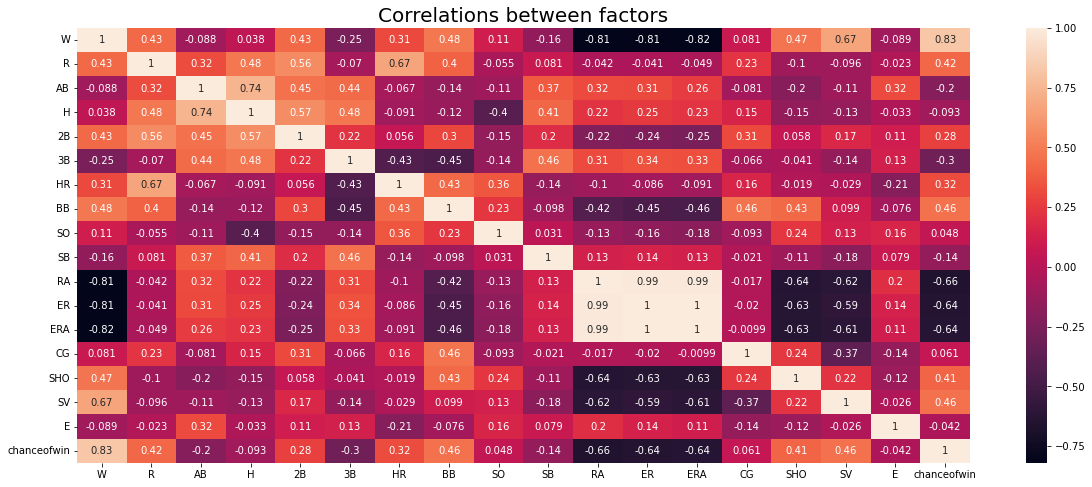

In [428]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [429]:
#From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolute value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [430]:
print(abs(correlations) > 0.2)

W               True
chanceofwin     True
SV              True
BB              True
SHO             True
R               True
2B              True
HR              True
SO             False
CG             False
H              False
AB             False
E              False
SB             False
3B              True
ER              True
RA              True
ERA             True
Name: W, dtype: bool


<AxesSubplot:xlabel='W', ylabel='R'>

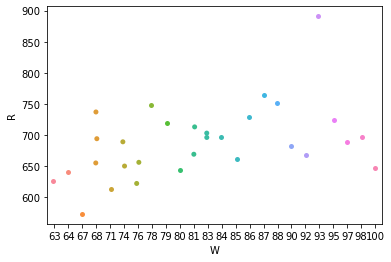

In [431]:
sns.stripplot(x='W',y='R', data=df)

<AxesSubplot:xlabel='W', ylabel='SV'>

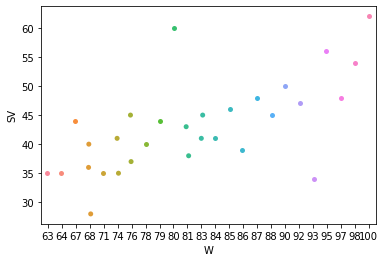

In [432]:
sns.stripplot(x='W',y='SV', data=df)

<AxesSubplot:xlabel='W', ylabel='ERA'>

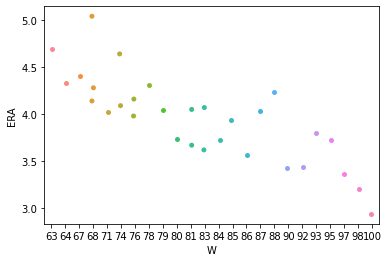

In [433]:
 sns.stripplot(x='W',y='ERA', data=df)

<AxesSubplot:xlabel='W', ylabel='BB'>

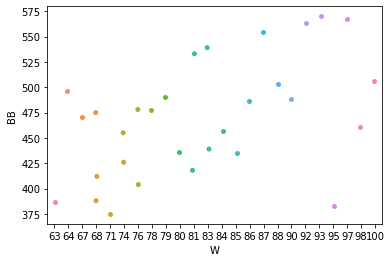

In [434]:
sns.stripplot(x='W',y='BB', data=df)

<AxesSubplot:xlabel='W', ylabel='SHO'>

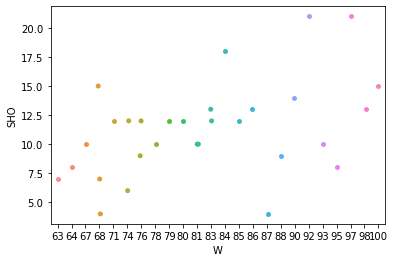

In [435]:
sns.stripplot(x='W',y='SHO', data=df)

<AxesSubplot:xlabel='W', ylabel='HR'>

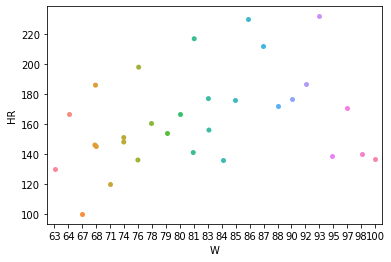

In [436]:
sns.stripplot(x='W',y='HR', data=df)

<AxesSubplot:xlabel='W', ylabel='2B'>

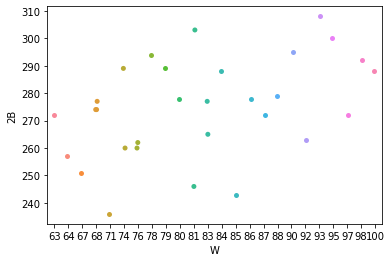

In [437]:
sns.stripplot(x='W',y='2B', data=df)

<AxesSubplot:xlabel='W', ylabel='3B'>

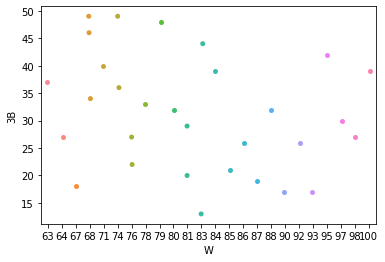

In [438]:
sns.stripplot(x='W',y='3B', data=df)

<AxesSubplot:xlabel='W', ylabel='ER'>

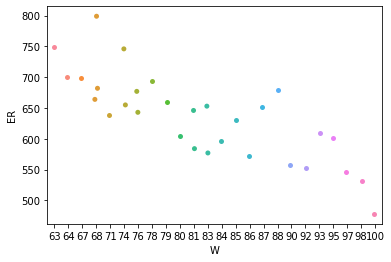

In [439]:
sns.stripplot(x='W',y='ER', data=df)

<AxesSubplot:xlabel='W', ylabel='SO'>

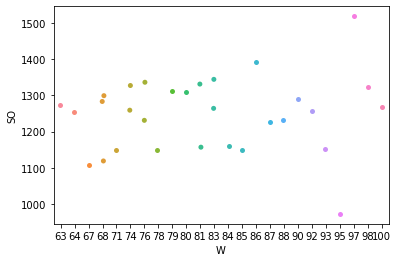

In [440]:
sns.stripplot(x='W',y='SO', data=df)

<AxesSubplot:xlabel='W', ylabel='RA'>

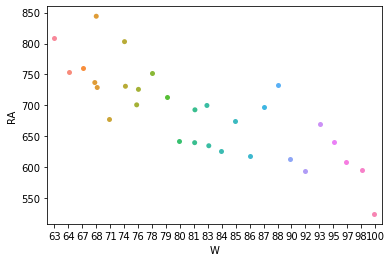

In [441]:
sns.stripplot(x='W',y='RA', data=df)

<AxesSubplot:xlabel='W', ylabel='E'>

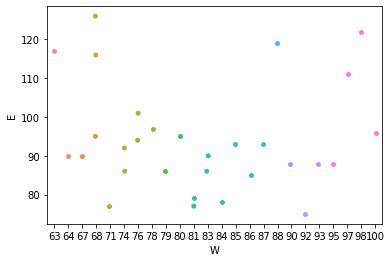

In [442]:
sns.stripplot(x='W',y='E', data=df)

<AxesSubplot:xlabel='W', ylabel='CG'>

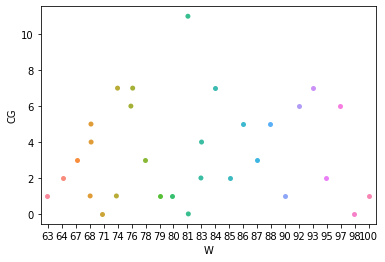

In [443]:
sns.stripplot(x='W',y='CG', data=df)

<AxesSubplot:xlabel='W', ylabel='H'>

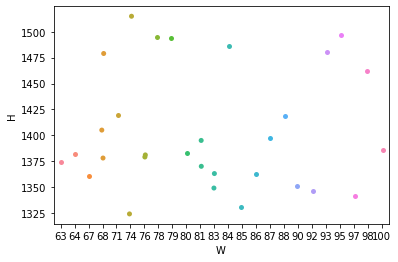

In [444]:
sns.stripplot(x='W',y='H', data=df)

In [445]:
##The number of runs(R), home runs((HR), doubles(2B), Saves(SV), Shutouts(SHO), and Walks(BB) are highly positively linearly correlated.

#Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER) are highly negative linearly correlated.

#The remaining features have very less or no linear correlation with no of Wins

#The dataset set has too much randomness. And only has sets of data (too little to form a suitable Decision tree)

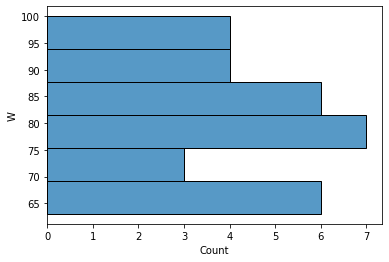

In [446]:
#lets visualize and analyse the data
sns.histplot(data=df,y='W')
plt.show()

In [447]:
df.skew()

W              0.047089
R              1.200786
AB             0.183437
H              0.670254
2B            -0.230650
3B             0.129502
HR             0.516441
BB             0.158498
SO            -0.156065
SB             0.479893
RA             0.045734
ER             0.058710
ERA            0.053331
CG             0.736845
SHO            0.565790
SV             0.657524
E              0.890132
chanceofwin    0.140769
dtype: float64

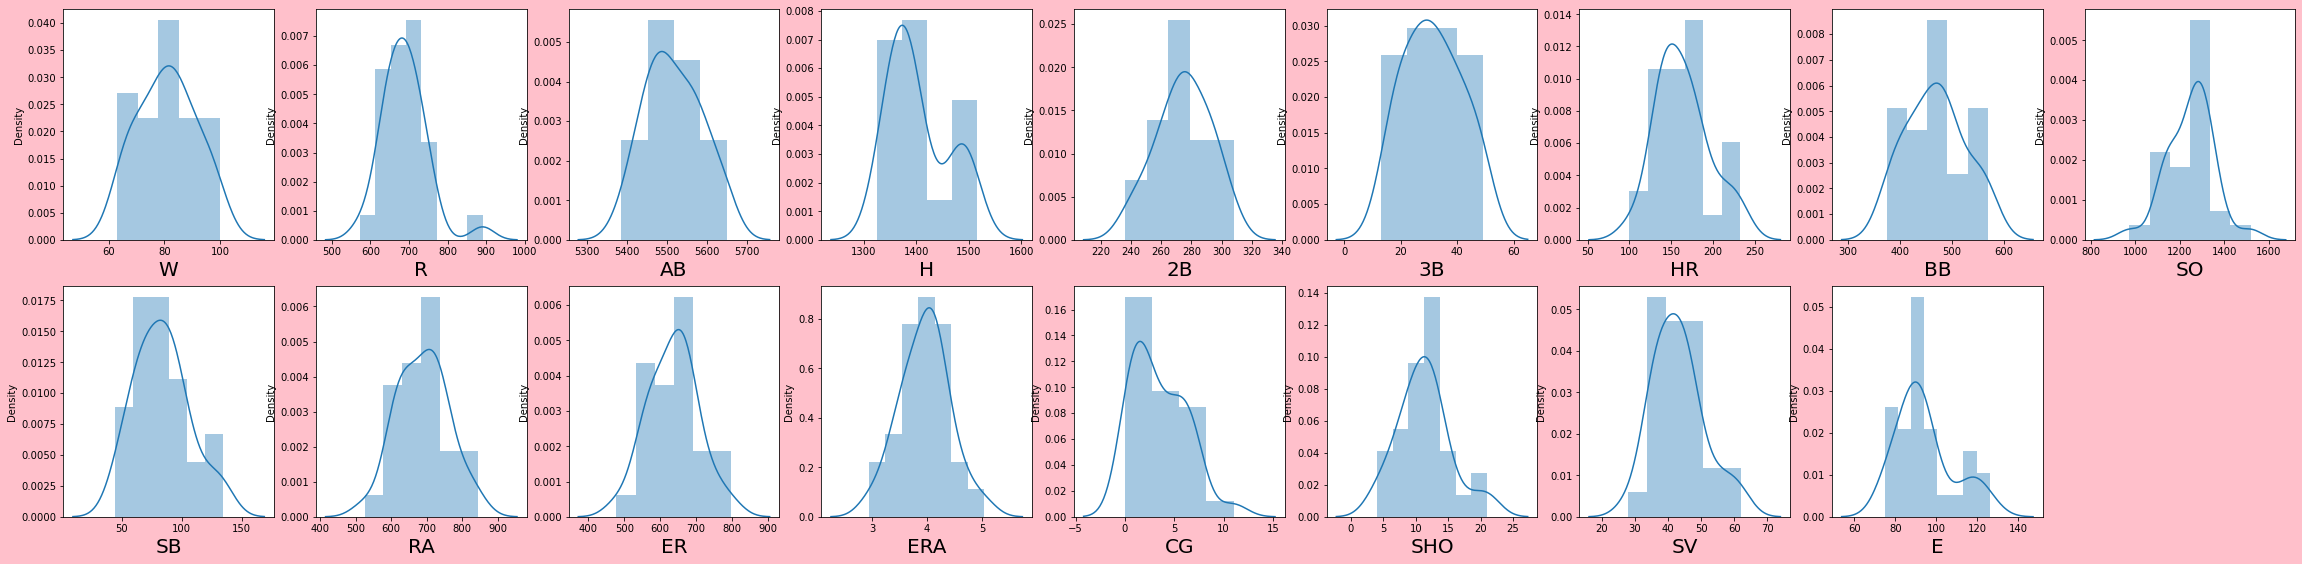

In [448]:
#lets visualize and analyse the data

plt.figure(figsize=(40,45),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(9,9,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

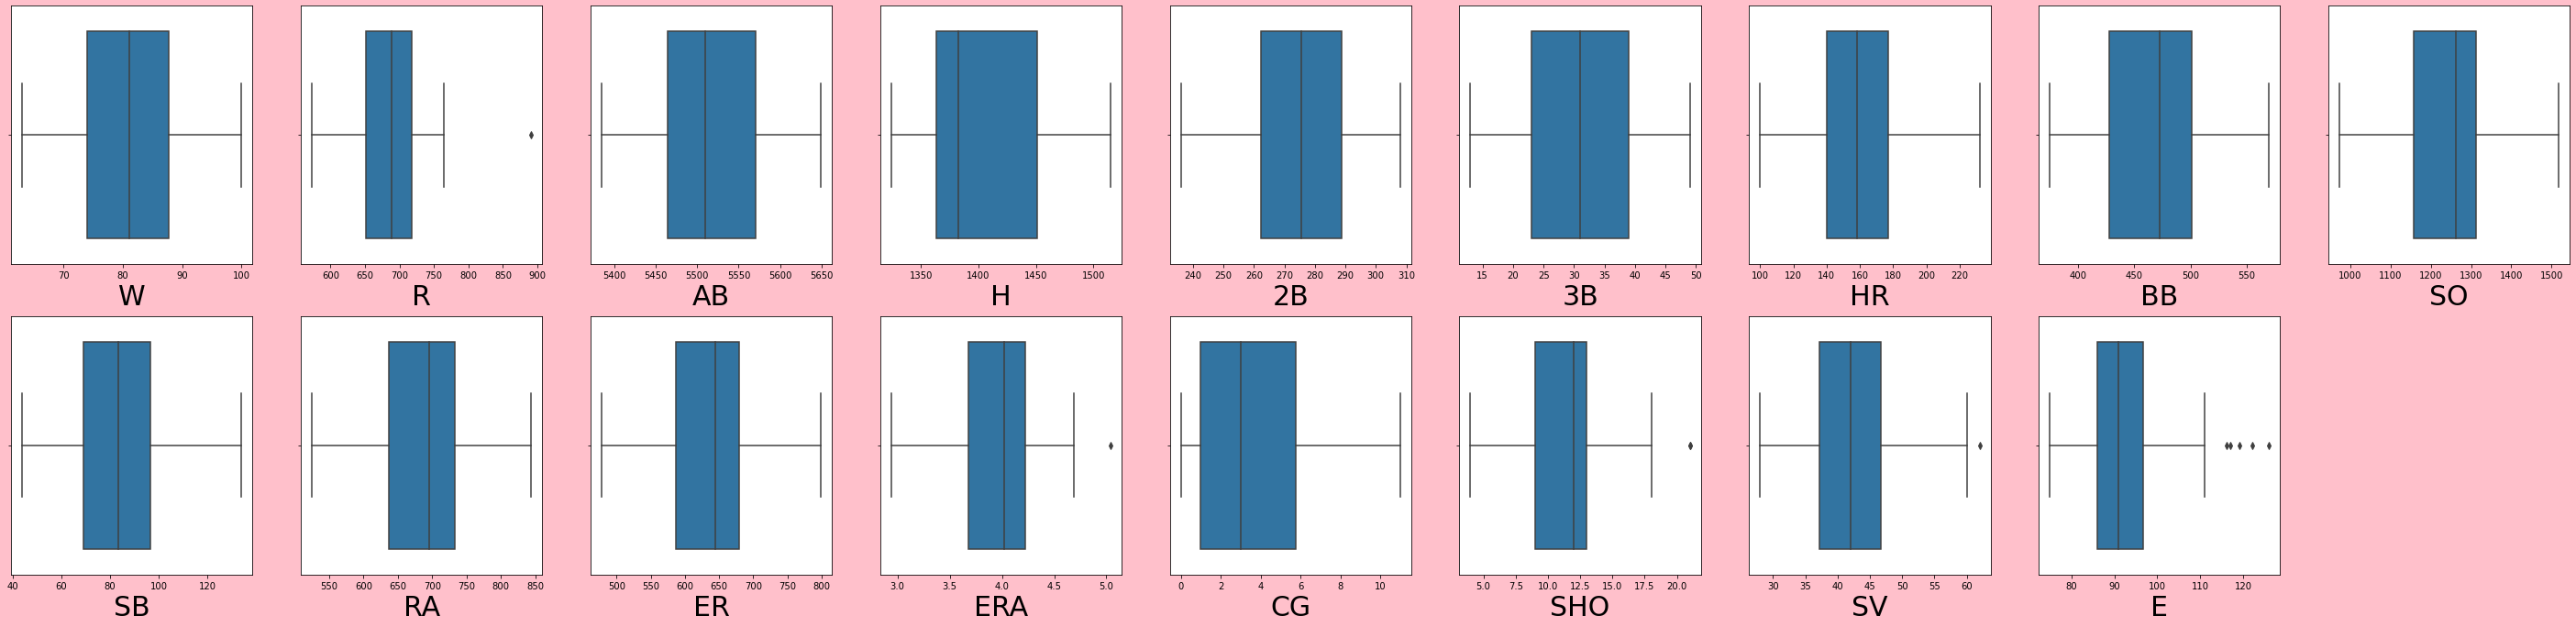

In [449]:
plt.figure(figsize=(50,55),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(9,9,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()

In [450]:
#Run(R) and win(W) are linearly correlated. And outliers are present between 850 and 900.
#At balls(AB) is very weekly related to Wins With no outliers.
#Hits(H) are also very weekly related to winning with no outliers
#Doubles(2B)are linearly related with Wins, with no outlier, and data is left-skewed
#TripleS(3B)has very weak negative correlations with win with no outlier and data is right-skewed
#The homeruns(HR) has a very low correlation with wins with no lot of outliers and data is right-skewed
#Walks(BB)is lightly correlated to win with no outlier
#Strikeout(SO) is not correlated to win with no outlier and the dataset is left-skewed.
#Stolen Bases(SB) is not correlated to win with no outlier
#Runs Allowed(RA) is highly correlated to win with no outliers
#EarnedRuns(ER) is highly correlated to win with no outliers
#Earned Run Average (ERA) is not correlated to win with outliers and data is right-skewed.
#Shutouts(SHO) are highly correlated to win with outliers and data is right-skewed.
#Saves(SV) are lightly correlated to win with no outliers-skewed.
#Errors(E) are not correlated to win, the data has outliers and data is right-skewed

In [451]:
#now we remove skewness by power transform...

In [452]:
x_new=power_transform(X)

In [453]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

1     0.276995
13    0.059966
14    0.057785
9     0.035185
8     0.012717
11    0.006336
10    0.005813
2     0.000000
5    -0.003702
6    -0.013838
12   -0.020258
15   -0.037752
0    -0.038045
4    -0.049845
3    -0.057611
7    -0.112317
dtype: float64

In [454]:
#now we will be removing outliers by IQR method

In [455]:
q1=df.quantile(0.25)

q3=df.quantile(0.75)

iqr=q3-q1

In [456]:
R_high=(q3.R + (1.5 * iqr.R))
R_high

index = np.where(df['R'] >R_high)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,1
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,1
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,0
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,0
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,0
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,1


In [457]:
ERA_high =(q3.ERA + (1.5 * iqr.ERA))
ERA_high

index = np.where(df['ERA'] > ERA_high)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,1
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,1
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,0
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,0
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,0
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,1


In [458]:
SHO_high=(q3.SHO+ (1.5 * iqr.SHO))
print (SHO_high)

index = np.where(df['SHO'] > SHO_high)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

19.0


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,1
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,1
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,0
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,0
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,0
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,1


In [459]:
SV_high=(q3.SV + (1.5 * iqr.SV))
print (SV_high)

index = np.where(df['SV'] >SV_high)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

61.0


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,1
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,1
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,0
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,0
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,0
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,1


In [460]:
E_high=(q3.E + (1.5 * iqr.E))
print (E_high)

index = np.where(df['E'] > E_high)
index

df= df.drop(df.index[index])
df.shape

df.reset_index()

112.875


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,chanceofwin
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,1
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,0
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,0
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,0
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,1
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,0
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,0
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,0
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85,1


In [461]:
X= df.drop(columns=['W','chanceofwin'])
y = df['chanceofwin']

In [462]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [463]:
X_scaled.shape[1]

16

In [464]:
vif=pd.DataFrame()

In [465]:
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [466]:
vif["Features"]=X.columns
vif

,vif,Features
0,39.708041,R
1,141.142572,AB
2,32.875135,H
3,32.689242,2B
4,59.652461,3B
5,51.352184,HR
6,17.624292,BB
7,14.135117,SO
8,6.202011,SB
9,385.454748,RA


In [467]:
X_scaled.shape

(20, 16)

In [468]:
for i in range(0,100):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(x_train,y_train)
    pred_train = reg.predict(x_train)
    y_pred= reg.predict(x_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-1.0
At random state0,the testing accuracy is:-0.5


At random state1,the training accuracy is:-1.0
At random state1,the testing accuracy is:-0.75


At random state2,the training accuracy is:-1.0
At random state2,the testing accuracy is:-0.75


At random state3,the training accuracy is:-1.0
At random state3,the testing accuracy is:-0.5


At random state4,the training accuracy is:-1.0
At random state4,the testing accuracy is:-0.75


At random state5,the training accuracy is:-1.0
At random state5,the testing accuracy is:-0.5


At random state6,the training accuracy is:-1.0
At random state6,the testing accuracy is:-0.5


At random state7,the training accuracy is:-1.0
At random state7,the testing accuracy is:-0.25


At random state8,the training accuracy is:-1.0
At random state8,the testing accuracy is:-0.5


At random state9,the training accuracy is:-1.0
At random state9,the testing accuracy is:-0.25


At random state10,the training accuracy is:-1

In [469]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=43)

In [470]:
x_train.shape

(16, 16)

In [471]:
y_train.shape

(16,)

In [472]:
x_test.shape

(4, 16)

In [473]:
y_test.shape

(4,)

In [474]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.25

In [475]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[1, 1],
       [2, 0]], dtype=int64)

In [476]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



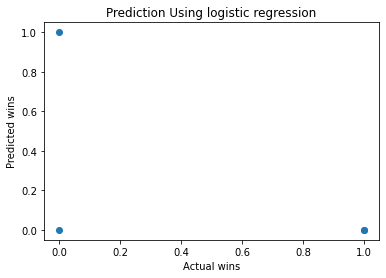

In [477]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using logistic regression")
plt.xlabel("Actual wins")
plt.ylabel("Predicted wins")
plt.show()

In [478]:
knc= KNeighborsClassifier()  
knc.fit(x_train, y_train)  
knc.score(x_train,y_train)
y_pred=knc.predict(x_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

accuracy score: 50.0


In [479]:
kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

cross val score: 70.0


In [497]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred=dt.predict(x_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 75.0
cross val score: 50.0


In [498]:
import xgboost as xgb
from xgboost import XGBClassifier

In [499]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
y_pred=model.predict(x_test)
xg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',xg_score*100)

xgscore=cross_val_score(xg,X,y,cv=5)
xgr=xgscore.mean()
print('cross val score:',xgr*100)

accuracy score: 100.0
cross val score: 60.0


In [500]:
parameters={"colsample_bytree": [0.7, 1],
    "gamma": [0, 0.5],
    "learning_rate": [0.1, 0.3], 
    "max_depth": [2, 3],
    "n_estimators": [100, 150],
    "subsample": [0.6, 1]}

clf=GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.6}


In [501]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

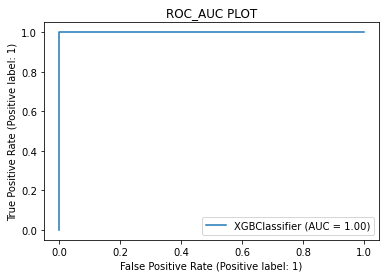

In [502]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [503]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 75.0
cross val score: 70.0


In [504]:
grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1],'max_leaf_nodes':[None]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1}


In [506]:

rf=RandomForestClassifier(bootstrap='True',criterion= 'entropy',max_features='auto',max_depth=7, max_leaf_nodes=None, min_samples_leaf= 1)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 75.0
cross val score: 60.0


In [507]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [508]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto')

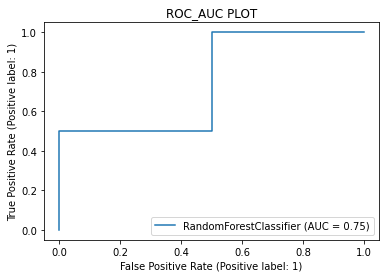

In [509]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [514]:
#so according to dataset  XGBoostclassifier is getting best accuracy of 100%,which is best among all and 
#the AUC value according to this XGBoostClassifier is 1.now we do gridsearcv hyperparametertuning on this algorithm

In [524]:
parameters={"colsample_bytree": [0.7, 1],
    "gamma": [0, 0.5],
    "learning_rate": [0.1, 0.3], 
    "max_depth": [2, 3],
    "n_estimators": [100, 150],
    "subsample": [0.6, 1]}

clf=GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.6}


In [525]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [527]:

xg=XGBClassifier(colsample_bytree= 0.7, gamma= 0, learning_rate= 0.3, max_depth= 2, n_estimators=100, subsample= 0.6)
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
y_pred=model.predict(x_test)
xg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',xg_score*100)

xgscore=cross_val_score(xg,X,y,cv=5)
xgr=xgscore.mean()
print('cross val score:',xgr*100)

accuracy score: 100.0
cross val score: 75.0


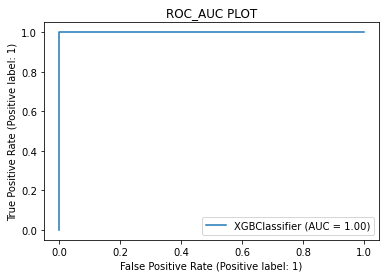

In [528]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [529]:
#the best model is XGBclassifier with 100% accuracy and 75% cross validation score and ROC-AUC-SCORE=1.00

In [530]:
#saving the model to local file system
filename='baseballprediction_model.pickle'
pickle.dump(xg,open(filename,'wb'))